# Домашняя работа №1

В данной домашней работе анализируется датасет "Wine Quality", в котором собрана информация о красных и белых винах, производимых на севере Португалии.

Произведем иморт необходимых для анализа модулей:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

## 1. Чтение данных

Белые и красные вина располагаются в двух разных .csv файлах. Добавим в каждый из них новую колонку с типом вина и объединим все в одну таблицу

In [2]:
url_red = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data_raw_red = pd.read_csv(url_red, ";")
data_raw_red['type'] = "red"

url_white = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
data_raw_white = pd.read_csv(url_white, ";")
data_raw_white["type"] = "white"

In [3]:
data_raw = pd.concat([data_raw_red, data_raw_white], ignore_index=True)

В описании к датасету было указано, что каждому образцу была присвоена оценка, в диапазоне от 1 до 10. Введем новый столбец для типа качества, где 1-4 - 0 (плохое), 5-7 - 1 (обычное), 8-10 - 2 (хорошее):

In [4]:
conditions = [
    data_raw['quality'] >= 8,
    data_raw['quality'] < 5,
]

choices = [2, 0]

data_raw['type_quality'] = np.select(conditions, choices, default=1)

In [5]:
data_raw

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,type_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,1


Как мы можем наблюдать, в нашем датасете имеются следующие признаки:
* Нелетучая кислота (содержание винной кислоты в г/дм^3)
* Летучая кислота (содержание уксусной кислоты в г/дм^3)
* Лимонная кислота (г/дм^3)
* Остаточный сахар (натуральный сахар из виноградных ягод, который не переработался в спирт в процессе ферментации и дает вину ту или иную степень сладости - г/дм^3)
* Хлориды (хлористый натрий - г/дм^3)
* Свободный диоксид серы (появляется естественным путем в процессе брожения - мг/дм^3)
* Общее содержание диоксида серы (свободный диоксид серы + диоксид серы, добавленный самим производителем - мг/дм^3)
* Плотность вина (г/дм^3)
* Водородный показатель (pH)
* Сульфаты (сульфат калия в г/дм^3)
* Содержание спирта (%)
* Качество (1-3 - плохое, 4-7 - обычное, 8-10 - отличное)
* Тип (красное или белое)

## 2. Визуализация данных

In [6]:
data_raw.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
type_quality              int32
dtype: object

In [7]:
data_raw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.992612
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.261333
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,2.000000


Как можно видеть, в средний процент содержания спирта - 10.5%. Это говорит о том, что в основном мы имеем дело с сухими и полусухими винами.

In [8]:
data_raw.describe(include = ['object'])

,type
count,6497
unique,2
top,white
freq,4898


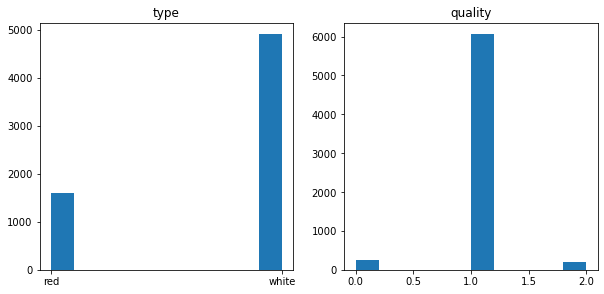

In [9]:
fig = plt.figure(figsize = (10, 10))
ax_1 = fig.add_subplot(2, 2, 1)
ax_2 = fig.add_subplot(2, 2, 2)
ax_1.hist(data_raw.loc[:, "type"])
ax_1.set_title('type')
ax_2.hist(data_raw.loc[:, "type_quality"])
ax_2.set_title('quality');

На основе этих диаграмм можно сделать вывод о том, что большинство образцов являются белыми винами и наиболее распространены обычные вина.

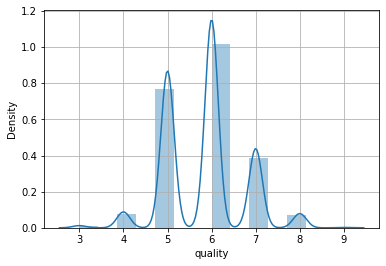

In [10]:
sns.distplot(data_raw['quality'], bins=14)
plt.grid()
pass

Наиболее распространенные оценки в порядке убывания: 6, 5, 7

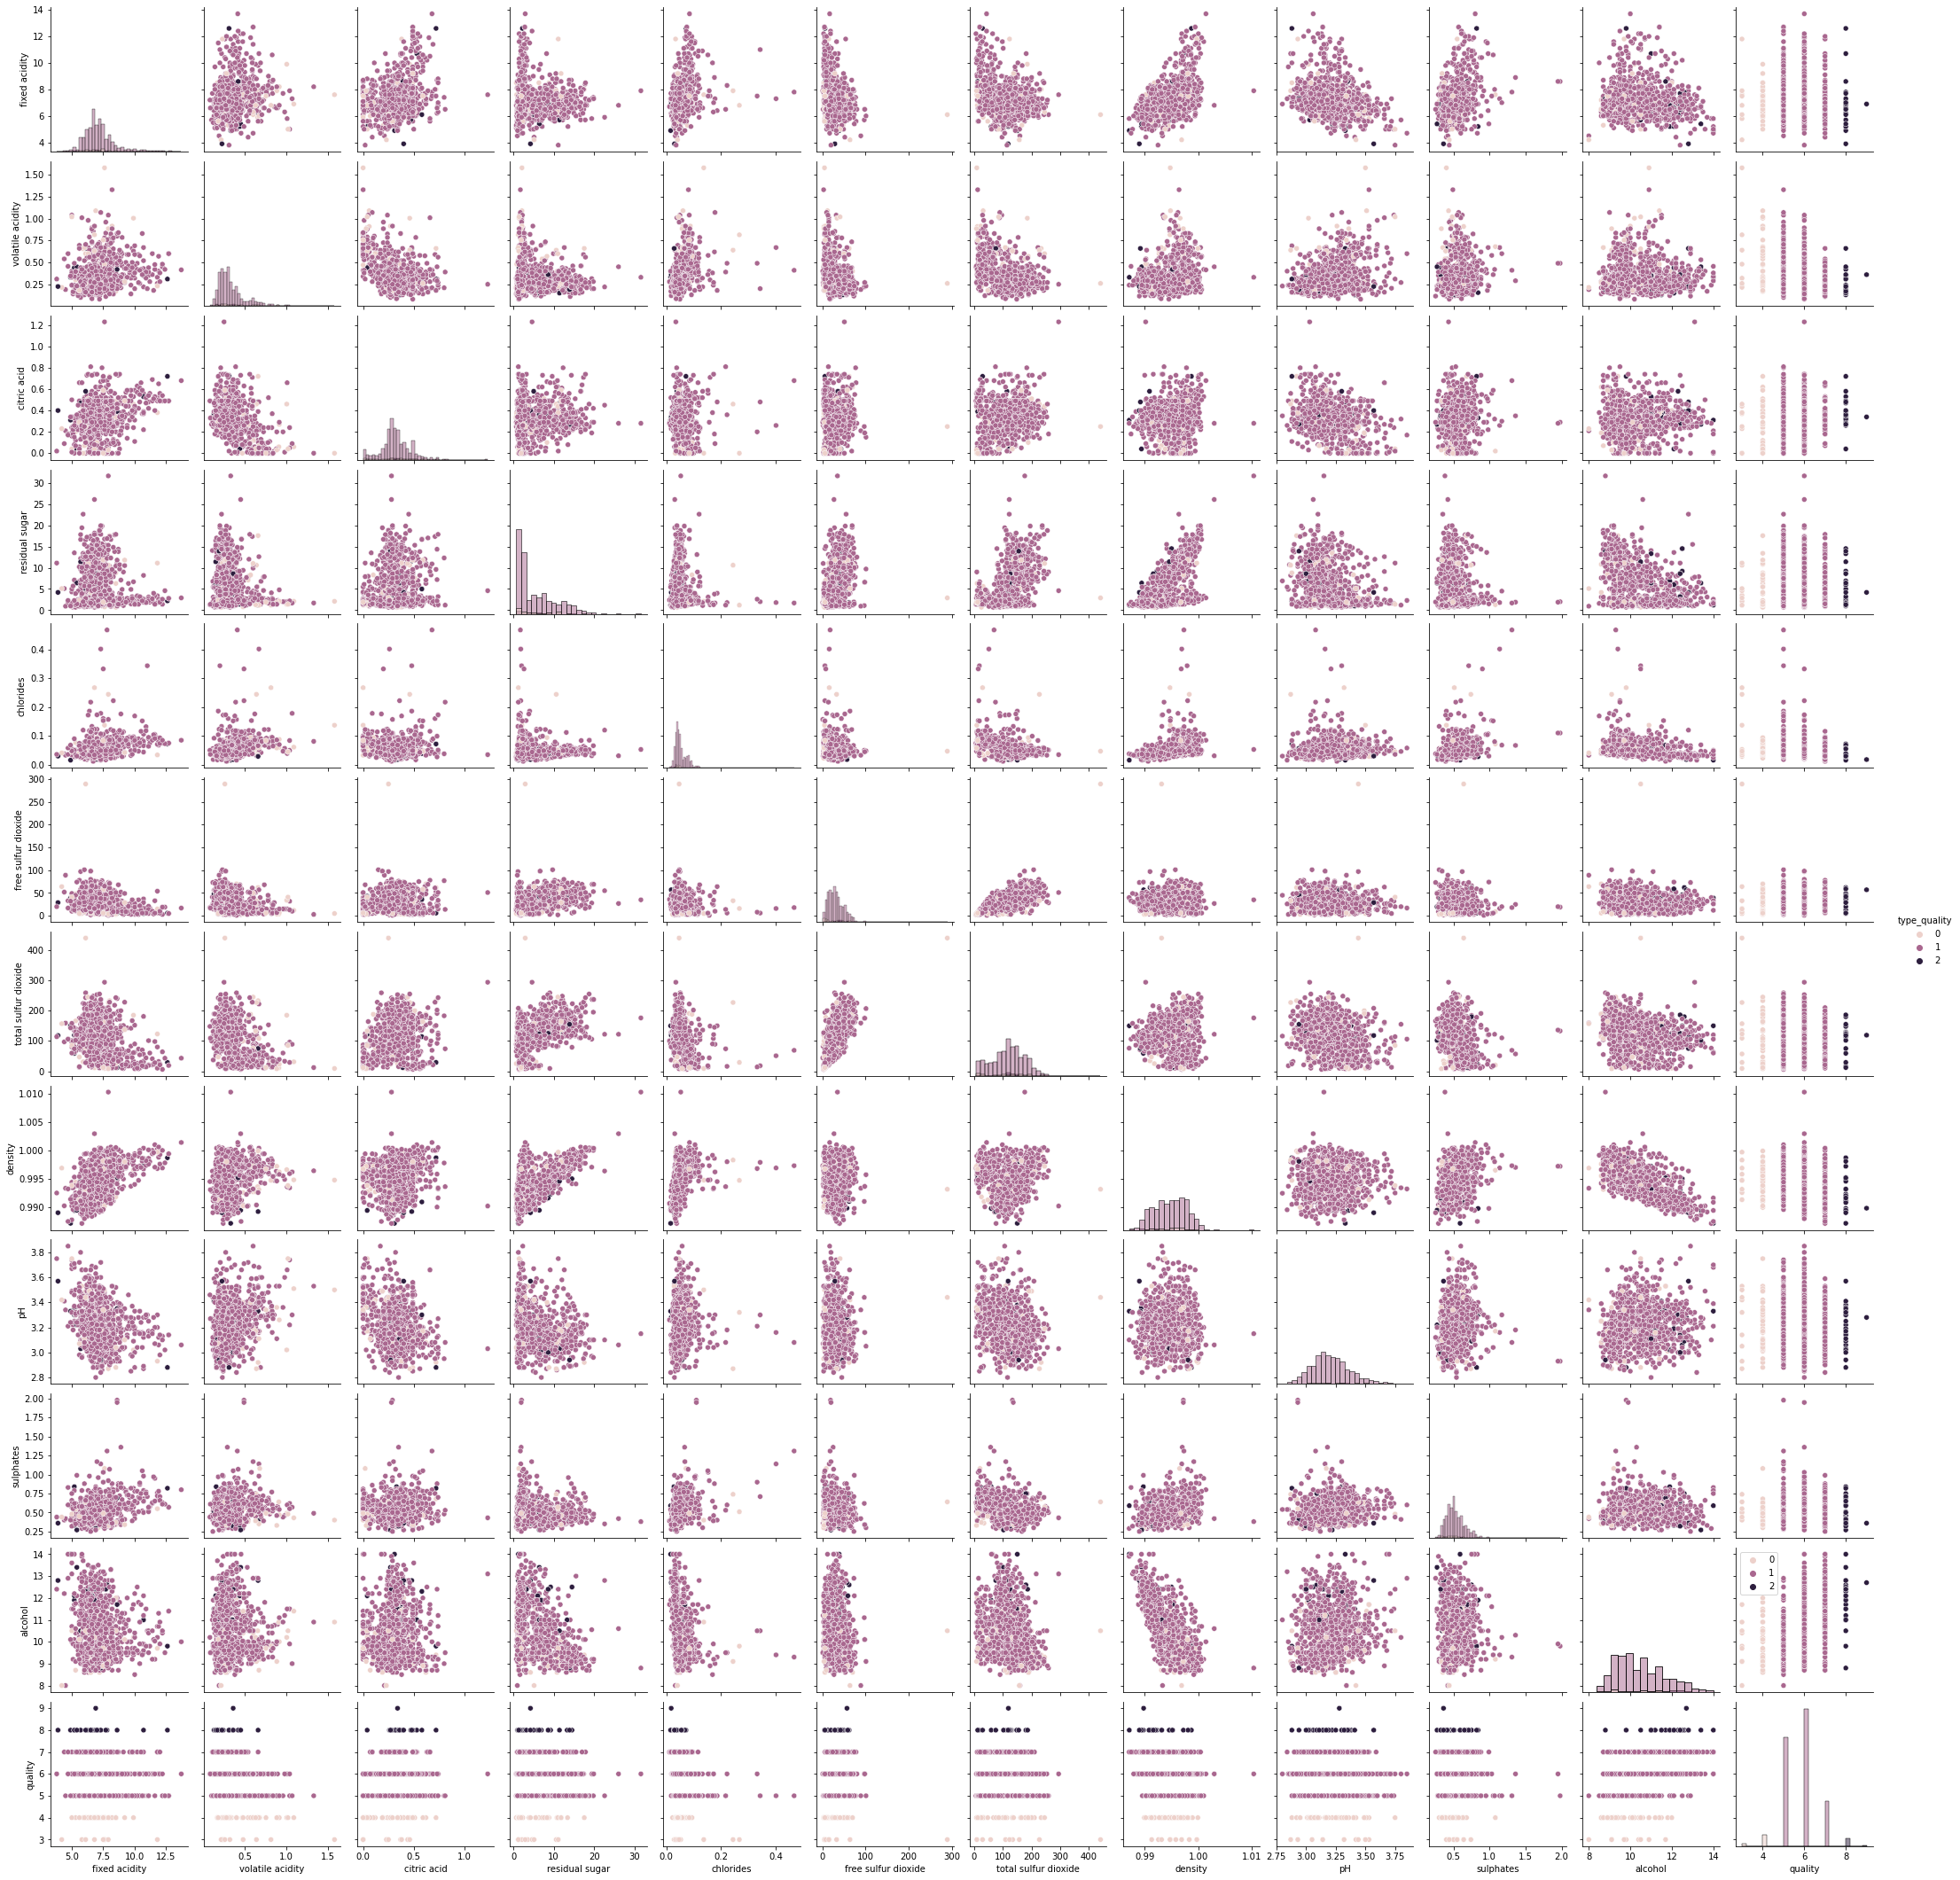

In [11]:
np.random.seed(63)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=1000, replace=False)
sns.pairplot(data_raw.iloc[random_subset], hue='type_quality', diag_kind='hist')
plt.legend()
pass

In [12]:
corr_mat = data_raw.corr()
corr_mat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,-0.048783
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,-0.144803
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,0.057376
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,0.033351
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,-0.075989
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,0.088386
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,0.029329
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,-0.097890
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,-0.009716
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.009227


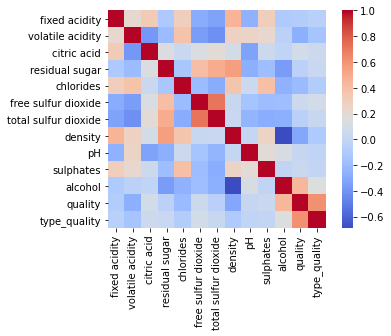

In [13]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

In [14]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending=False)

free sulfur dioxide  total sulfur dioxide    0.720934
quality              type_quality            0.616734
residual sugar       density                 0.552517
dtype: float64

Данные коррелляции вполне объяснимы, свободный диоксид серы входит в общий диоксид серы. Тип качества - производный от качества. Сахар сам по себе плотен и потому повышает общую плотность вина.

## 3. Обработка пропущенных значений

In [15]:
data_raw.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
type_quality            0
dtype: int64

Пропущенных значений не обнаружено.

## 4. Обработка категориальных признаков
Приведем типы вина к бинарному представлению, где red - 0, white - 1

In [16]:
data_raw['type'] = pd.factorize(data_raw['type'])[0]

На этом обработка категориальных значений закончена

## 5. Нормализация
Проведем нормализацию количественных признаков:

In [17]:
data_stand = (data_raw - data_raw.mean(axis = 0))/data_raw.std(axis = 0)

In [18]:
data_stand.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,type_quality
count,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03
mean,9.396824e-16,-2.652262e-14,4.807301e-14,-2.252111e-15,1.278966e-14,-6.367933e-17,-5.225926e-16,2.181060e-12,-3.317152e-14,-6.607989e-15,-1.231775e-14,-3.741030e-15,4.664543e-14,5.388104e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.634386e+00,-1.577208e+00,-2.192664e+00,-1.017956e+00,-1.342536e+00,-1.663455e+00,-1.941631e+00,-2.529997e+00,-3.100376e+00,-2.091774e+00,-2.089189e+00,-3.227439e+00,-1.750055e+00,-3.798259e+00
25%,-6.288845e-01,-6.661100e-01,-4.722972e-01,-7.657389e-01,-5.147590e-01,-7.620156e-01,-6.854795e-01,-7.858922e-01,-6.748102e-01,-6.805395e-01,-8.315512e-01,-9.371575e-01,5.713226e-01,2.827049e-02
50%,-1.660764e-01,-3.016707e-01,-5.940918e-02,-5.135217e-01,-2.578628e-01,-8.593639e-02,3.990360e-02,6.448391e-02,-5.287017e-02,-1.429263e-01,-1.608107e-01,2.079830e-01,5.713226e-01,2.827049e-02
75%,3.738663e-01,3.664680e-01,4.911081e-01,5.584015e-01,2.559297e-01,5.901428e-01,7.122099e-01,7.647937e-01,6.312639e-01,4.618885e-01,6.776148e-01,2.079830e-01,5.713226e-01,2.827049e-02
max,6.698910e+00,7.533774e+00,9.230570e+00,1.268585e+01,1.584097e+01,1.456245e+01,5.736815e+00,1.476765e+01,4.922650e+00,9.870119e+00,3.695947e+00,3.643405e+00,5.713226e-01,3.854800e+00


## 6. Разделение на обучающую и тестовую выборки

In [19]:
data_stand.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type', 'type_quality'],
      dtype='object')

Поскольку в оригинальном датасете сначала идут красные вина, а потом уже белые, то перетасуем строки для разделения на выборки

In [20]:
data_stand.sample(frac=1).reset_index(drop=True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,type_quality
0,0.373866,-1.334249,0.009405,-0.849811,0.113210,0.928182,0.606056,0.167863,0.942234,-0.747741,-1.083079,0.207983,0.571323,0.02827
1,-0.243211,-0.362411,0.353479,0.768582,-0.543303,-0.818356,-0.703172,0.034471,-1.047974,0.058679,0.509930,-0.937157,0.571323,0.02827
2,-0.628884,-0.605370,1.179255,0.074985,-0.086599,-0.311296,0.075288,-0.165618,-1.296750,3.015551,0.006874,0.207983,0.571323,0.02827
3,0.759540,-0.180191,0.766367,0.327202,-0.257863,-0.705676,-0.508557,0.528022,0.071518,0.730695,0.090717,-0.937157,0.571323,0.02827
4,-0.320346,-0.969809,0.009405,0.369239,-0.257863,-0.762016,-0.119327,0.094497,1.253204,-0.613338,-0.076968,0.207983,0.571323,0.02827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.166076,1.702745,-0.954000,-0.828793,0.170298,-1.325415,-1.163171,0.134515,-0.861392,0.461889,-0.999236,-0.937157,-1.750055,0.02827
6493,0.373866,-0.544630,0.766367,-0.198250,0.170298,-0.592996,-0.013173,0.634736,1.004428,-0.210128,-0.496181,0.207983,0.571323,0.02827
6494,-0.397480,-1.273509,0.903996,-0.261304,-0.372039,1.209882,0.269903,-1.025998,-0.985780,0.058679,0.677615,0.207983,0.571323,0.02827
6495,0.682405,1.247196,-0.954000,-0.744721,0.684090,-0.987375,-1.428555,0.834825,0.506876,0.394687,-1.250764,0.207983,-1.750055,0.02827


Используем все признаки, кроме quality и free sulfur dioxide (поскольку они корреляционны с type_quality и total sulfur dioxide):

In [21]:
x = np.array(data_stand.drop(['quality', 'free sulfur dioxide', 'type_quality'], axis=1))
y = np.array(data_raw['type_quality'])

Разделим данные в пропорции 1/3, 25% отводится на обучающую выборку, 75% - на тестовую

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 63)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(4872, 1625)

## 7. Классификация

### Метод kNN
Для начала возьмем 10 соседей

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [24]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)

In [25]:
err_test

0.06953846153846154

Посмотрим, можем ли мы улучшить полученный результат:

In [26]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.06834921062375854 20


Можем, если возьмем 20 соседей

In [27]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.06834975369458128 0.0683076923076923


Метод ближайших соседей прекрасно себя показал, вероятность ошибки - всего ~7% как в тестовой, так и в обучающех выборках.
Запустим другой классификатор.
### Метод Random Forest

In [28]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.05723076923076923


Метод случайного леса показал себя еще лучше, вероятность ошибки в тестовой выборке уменьшилась до ~5.7% 

## Выводы
В данной домашней работе мы проанализировали датасет "Wine Quality". Мы выполнили: визуализацию данных, вычислили основные характеристики, удостоверились в отсутствии пропущенных значений, бинаризировали номинальный признак "тип вина", нормализовали количественные признаки, разбили данные на обучающую и тестовую выборки, применили алгоритмы классификации к обработанному набору данных (метод k ближайших соседей и метод случайного леса). По созданному классификатору можно предсказывать качество вина с довольно высокой точностью.